In [1]:
%load_ext autoreload
%autoreload 2

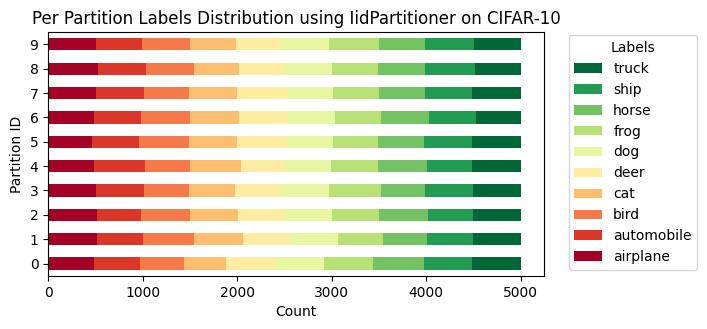

In [36]:
from flwr_datasets.partitioner import Partitioner, IidPartitioner
from flwr_datasets.visualization import plot_label_distributions
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import DirichletPartitioner

fds = FederatedDataset(
        dataset="cifar10",
        partitioners={
            "train": 10,
        },
    )
LABEL_NAME = "label"
fix, ax, df = plot_label_distributions(
        partitioner=fds.partitioners["train"],
        label_name=LABEL_NAME,
        plot_type="bar",
        partition_id_axis="y",
        legend=True,
        title="Per Partition Labels Distribution using IidPartitioner on CIFAR-10", 
        verbose_labels=True,
)


In [ ]:
from flwr_datasets.partitioner.partitioner import Partitioner
from flwr_datasets.visualization import plot_comparison_label_distribution
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import DirichletPartitioner

partitioner_list = []
alpha_list = [0.1, 1.0, 10.0, 100.0]
for alpha in alpha_list:
    fds = FederatedDataset(
        dataset="cifar10",
        partitioners={
            "train": DirichletPartitioner(
                num_partitions=10,
                partition_by="label",
                alpha=alpha,
                min_partition_size=0,
            ),
        },
    )
    partitioner_list.append(fds.partitioners["train"])
fig, axes, df_list = plot_comparison_label_distribution(
    partitioner_list=partitioner_list,
    label_name="label",
    titles=[f"α = {alpha}" for alpha in alpha_list],
    subtitle="Comparison of Label Size using DirichletPartitioner for Different α on CIFAR-10",
    legend=True,
    size_unit="absolute",
    partition_id_axis="x",
    
)
fig.supxlabel("Number of Samples")
fig.supxlabel("Partition ID")
fig.show()

/root/.pyenv/versions/3.10.9/envs/fl-heterogeneity/lib/python3.10/site-packages/flwr_datasets/visualization/comparison_label_distribution.py:213: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


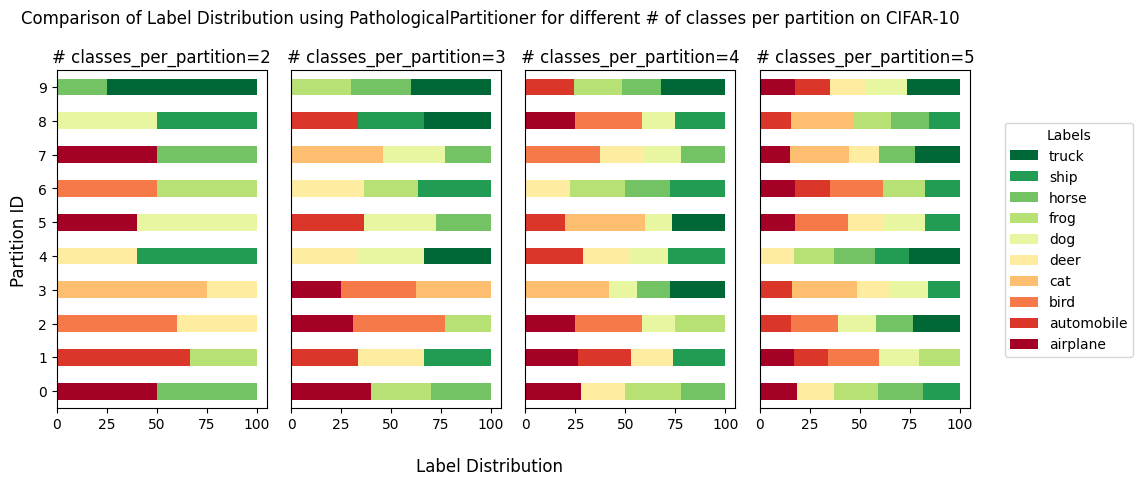

In [43]:
from flwr_datasets.partitioner.partitioner import Partitioner
from flwr_datasets.visualization import plot_comparison_label_distribution
from flwr_datasets import FederatedDataset
import os 
os.sys.path.append(os.path.dirname(os.path.abspath('./..')))

from heterogeneity.fl.pathological_partitioner import PathologicalPartitioner

partitioner_list = []
num_classes_per_partition_list = [2, 3, 4, 5]
for num_classes_per_partition in num_classes_per_partition_list:
    fds = FederatedDataset(
        dataset="cifar10",
        partitioners={
            "train": PathologicalPartitioner(
                num_partitions=10,
                num_classes_per_partition=num_classes_per_partition,
                partition_by="label",
                class_assignment_mode="first-deterministic"
            ),
        },
    )
    partitioner_list.append(fds.partitioners["train"])
fig, axes, df_list = plot_comparison_label_distribution(
    partitioner_list=partitioner_list,
    label_name="label",
    titles=[f"# classes_per_partition={n_classes}" for n_classes in num_classes_per_partition_list],
    subtitle="Comparison of Label Distribution using PathologicalPartitioner for different # of classes per partition on CIFAR-10",
    legend=True,
    partition_id_axis="y",
    
)
fig.supxlabel("Label Distribution")
fig.supylabel("Partition ID")
fig.show()

In [31]:
# from flwr_datasets.partitioner.partitioner import Partitioner
# from flwr_datasets import FederatedDataset
# from flwr_datasets.partitioner import DirichletPartitioner

# #Fix for the comparison plot with the absolute size_unit

# from typing import Any, Dict, List, Optional, Tuple, Union

# import matplotlib.colors as mcolors
# import matplotlib.pyplot as plt
# import pandas as pd
# from matplotlib.axes import Axes
# from matplotlib.figure import Figure

# from flwr_datasets.common import EventType, event
# from flwr_datasets.partitioner import Partitioner
# from flwr_datasets.visualization.constants import PLOT_TYPES
# from flwr_datasets.visualization.label_distribution import plot_label_distributions


# # pylint: disable=too-many-arguments,too-many-locals
# def plot_comparison_label_distribution(
#     partitioner_list: List[Partitioner],
#     label_name: Union[str, List[str]],
#     plot_type: str = "bar",
#     size_unit: str = "percent",
#     max_num_partitions: Optional[int] = 30,
#     partition_id_axis: str = "y",
#     figsize: Optional[Tuple[float, float]] = None,
#     subtitle: str = "Comparison of Per Partition Label Distribution",
#     titles: Optional[List[str]] = None,
#     cmap: Optional[Union[str, mcolors.Colormap]] = None,
#     legend: bool = False,
#     legend_title: Optional[str] = None,
#     verbose_labels: bool = True,
#     plot_kwargs_list: Optional[List[Optional[Dict[str, Any]]]] = None,
#     legend_kwargs: Optional[Dict[str, Any]] = None,
# ) -> Tuple[Figure, List[Axes], List[pd.DataFrame]]:
#     """Compare the label distribution across multiple partitioners.

#     Parameters
#     ----------
#     partitioner_list : List[Partitioner]
#         List of partitioners to be compared.
#     label_name : Union[str, List[str]]
#         Column name or list of column names identifying labels for each partitioner.
#     plot_type : str
#         Type of plot, either "bar" or "heatmap".
#     size_unit : str
#         "absolute" for raw counts, or "percent" to normalize values to 100%.
#     max_num_partitions : Optional[int]
#         Maximum number of partitions to include in the plot. If None, all partitions
#         are included.
#     partition_id_axis : str
#         Axis on which the partition IDs will be marked, either "x" or "y".
#     figsize : Optional[Tuple[float, float]]
#         Size of the figure. If None, a default size is calculated.
#     subtitle : str
#         Subtitle for the figure. Defaults to "Comparison of Per Partition Label
#         Distribution"
#     titles : Optional[List[str]]
#         Titles for each subplot. If None, no titles are set.
#     cmap : Optional[Union[str, mcolors.Colormap]]
#         Colormap for determining the colorspace of the plot.
#     legend : bool
#         Whether to include a legend. If True, it will be included right-hand side after
#         all the plots.
#     legend_title : Optional[str]
#         Title for the legend. If None, the defaults will be takes based on the type of
#         plot.
#     verbose_labels : bool
#         Whether to use verbose versions of the labels.
#     plot_kwargs_list: Optional[List[Optional[Dict[str, Any]]]]
#         List of plot_kwargs. Any key value pair that can be passed to a plot function
#         that are not supported directly. In case of the parameter doubling
#         (e.g. specifying cmap here too) the chosen value will be taken from the
#         explicit arguments (e.g. cmap specified as an argument to this function not
#         the value in this dictionary).
#     legend_kwargs: Optional[Dict[str, Any]]
#         Any key value pair that can be passed to a figure.legend in case of bar plot or
#         cbar_kws in case of heatmap that are not supported directly. In case of
#         parameter doubling (e.g. specifying legend_title here too) the
#         chosen value will be taken from the explicit arguments (e.g. legend_title
#         specified as an argument to this function not the value in this dictionary).

#     Returns
#     -------
#     fig : Figure
#         The figure object containing the plots.
#     axes_list : List[Axes]
#         List of Axes objects for the plots.
#     dataframe_list : List[pd.DataFrame]
#         List of DataFrames used for each plot.

#     Examples
#     --------
#     Compare the difference of using different alpha (concentration) parameters in
#     DirichletPartitioner.

#     >>> from flwr_datasets import FederatedDataset
#     >>> from flwr_datasets.partitioner import DirichletPartitioner
#     >>> from flwr_datasets.visualization import plot_comparison_label_distribution
#     >>>
#     >>> partitioner_list = []
#     >>> alpha_list = [10_000.0, 100.0, 1.0, 0.1, 0.01, 0.00001]
#     >>> for alpha in alpha_list:
#     >>>     fds = FederatedDataset(
#     >>>         dataset="cifar10",
#     >>>         partitioners={
#     >>>             "train": DirichletPartitioner(
#     >>>                 num_partitions=20,
#     >>>                 partition_by="label",
#     >>>                 alpha=alpha,
#     >>>                 min_partition_size=0,
#     >>>             ),
#     >>>         },
#     >>>     )
#     >>>     partitioner_list.append(fds.partitioners["train"])
#     >>> fig, axes, dataframe_list = plot_comparison_label_distribution(
#     >>>     partitioner_list=partitioner_list,
#     >>>     label_name="label",
#     >>>     titles=[f"Concentration = {alpha}" for alpha in alpha_list],
#     >>> )
#     """
#     event(
#         EventType.PLOT_COMPARISON_LABEL_DISTRIBUTION_CALLED,
#         {
#             "num_compare": len(partitioner_list),
#             "plot_type": plot_type,
#         },
#     )
#     num_partitioners = len(partitioner_list)
#     if isinstance(label_name, str):
#         label_name = [label_name] * num_partitioners
#     elif isinstance(label_name, List):
#         pass
#     else:
#         raise TypeError(
#             f"Label name has to be of type List[str] or str but given "
#             f"{type(label_name)}"
#         )
#     figsize = _initialize_comparison_figsize(figsize, num_partitioners)
#     fig, axes = plt.subplots(1, num_partitioners, layout="constrained", figsize=figsize, sharey=True)

#     if titles is None:
#         titles = ["" for _ in range(num_partitioners)]

#     if plot_kwargs_list is None:
#         plot_kwargs_list = [None] * num_partitioners

#     dataframe_list = []
#     for idx, (partitioner, single_label_name, plot_kwargs) in enumerate(
#         zip(partitioner_list, label_name, plot_kwargs_list)
#     ):
#         if idx == (num_partitioners - 1):
#             *_, dataframe = plot_label_distributions(
#                 partitioner=partitioner,
#                 label_name=single_label_name,
#                 plot_type=plot_type,
#                 size_unit=size_unit,
#                 partition_id_axis=partition_id_axis,
#                 axis=axes[idx],
#                 max_num_partitions=max_num_partitions,
#                 cmap=cmap,
#                 legend=legend,
#                 legend_title=legend_title,
#                 verbose_labels=verbose_labels,
#                 plot_kwargs=plot_kwargs,
#                 legend_kwargs=legend_kwargs,
#             )
#             dataframe_list.append(dataframe)
#         else:
#             *_, dataframe = plot_label_distributions(
#                 partitioner=partitioner,
#                 label_name=single_label_name,
#                 plot_type=plot_type,
#                 size_unit=size_unit,
#                 partition_id_axis=partition_id_axis,
#                 axis=axes[idx],
#                 max_num_partitions=max_num_partitions,
#                 cmap=cmap,
#                 legend=False,
#                 plot_kwargs=plot_kwargs,
#             )
#             dataframe_list.append(dataframe)

#     # Do not use the xlabel and ylabel on each subplot plot
#     # (instead use global = per figure xlabel and ylabel)
#     for idx, axis in enumerate(axes):
#         axis.set_xlabel("")
#         axis.set_ylabel("")
#         axis.set_title(titles[idx])
#     # for axis in axes[1:]:
#     #     axis.set_yticks([])

#     # Set up figure xlabel and ylabel
#     xlabel, ylabel = _initialize_comparison_xy_labels(plot_type, partition_id_axis)
#     fig.supxlabel(xlabel)
#     fig.supylabel(ylabel)
#     fig.suptitle(subtitle)

#     fig.tight_layout()
#     return fig, axes, dataframe_list


# def _initialize_comparison_figsize(
#     figsize: Optional[Tuple[float, float]], num_partitioners: int
# ) -> Tuple[float, float]:
#     if figsize is not None:
#         return figsize
#     x_value = 4 + (num_partitioners - 1) * 2
#     y_value = 4.8
#     figsize = (x_value, y_value)
#     return figsize


# def _initialize_comparison_xy_labels(
#     plot_type: str, partition_id_axis: str
# ) -> Tuple[str, str]:
#     if plot_type == "bar":
#         xlabel = "Partition ID"
#         ylabel = "Class distribution"
#     elif plot_type == "heatmap":
#         xlabel = "Partition ID"
#         ylabel = "Label"
#     else:
#         raise ValueError(
#             f"Invalid plot_type: {plot_type}. Must be one of {PLOT_TYPES}."
#         )

#     if partition_id_axis == "y":
#         xlabel, ylabel = ylabel, xlabel

#     return xlabel, ylabel


# partitioner_list = []
# alpha_list = [0.1, 1.0, 10.0, 100.0]
# for alpha in alpha_list:
#     fds = FederatedDataset(
#         dataset="cifar10",
#         partitioners={
#             "train": DirichletPartitioner(
#                 num_partitions=10,
#                 partition_by="label",
#                 alpha=alpha,
#                 min_partition_size=0,
#             ),
#         },
#     )
#     partitioner_list.append(fds.partitioners["train"])
# fig, axes, df_list = plot_comparison_label_distribution(
#     partitioner_list=partitioner_list,
#     label_name="label",
#     titles=[f"α = {alpha}" for alpha in alpha_list],
#     subtitle="Comparison of Label Size using DirichletPartitioner for Different α on CIFAR-10",
#     legend=True,
#     size_unit="absolute",
#     partition_id_axis="x",
    
# )
# fig.supxlabel("Number of Samples")
# fig.supxlabel("Partition ID")
# fig.show()